# Yolo webcam setup

In [ ]:
from ultralytics import YOLOv10
import os
import matplotlib.pyplot as plt


root_path = "" # deinfe your working directory path

img_path = os.path.join(root_path ,"yolov10_finetune/fine_tune_kidney_stone_data/images/Modi_with_Gary.png")

pretrained_checkpoint_path = os.path.join(root_path , "yolov10_finetune/fine_tune_kidney_stone_data/pretrained_checkpoints/yolov10m.pt")
model = YOLOv10(pretrained_checkpoint_path)

result = model.predict(img_path)

plt.imshow(result[0].plot())
plt.show()

## obtain dataset

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="pN9ly9A9Dyo3OEf45Vk6")
project = rf.workspace("gemini-fincq").project("fish-species-combined")
version = project.version(3)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fish-species-combined-3 in yolov9:: 100%|██████████| 3874/3874 [00:01<00:00, 2977.02it/s]


## Train Dataset

In [2]:
import os
HOME = os.getcwd()

In [6]:
!mkdir -p {HOME}/weights

In [9]:
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt

In [ ]:
!ls -lh {HOME}/weights

total 876760
-rw-r--r--  1 jj  staff    79M May 23 02:38 yolov10b.pt
-rw-r--r--  1 jj  staff   100M May 23 02:38 yolov10l.pt
-rw-r--r--  1 jj  staff    64M May 23 02:38 yolov10m.pt
-rw-r--r--  1 jj  staff    11M May 23 02:38 yolov10n.pt
-rw-r--r--  1 jj  staff    31M May 23 02:38 yolov10s.pt
-rw-r--r--  1 jj  staff   122M May 23 02:38 yolov10x.pt


### how to use model

In [14]:
from ultralytics import YOLOv10
def useModel(home=HOME, file_location='test/images.jpeg'):
    file_location = f'{home}/{file_location}'
    model = YOLOv10(f'{home}/weights/yolov10n.pt')
    results = model(source=file_location, conf=0.25)
    print(results[0].boxes.xyxy)

In [12]:
useModel()

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



image 1/1 /Users/jj/projects/hackathon/reelrecon-ai/test/images.jpeg: 640x640 (no detections), 95.7ms
Speed: 4.9ms preprocess, 95.7ms inference, 8.5ms postprocess per image at shape (1, 3, 640, 640)
tensor([], size=(0, 4))


In [15]:
useModel(file_location='test/dog.jpeg')

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



image 1/1 /Users/jj/projects/hackathon/reelrecon-ai/test/dog.jpeg: 640x384 1 0, 1 16, 62.9ms
Speed: 1.1ms preprocess, 62.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 384)
tensor([[6.7041e+01, 2.5264e+02, 6.4549e+02, 9.6621e+02],
        [7.4646e-01, 3.4156e+02, 5.4170e+02, 1.2773e+03]])


### visualize prections

In [ ]:
import cv2
import supervision as sv

detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
	scene=image, detections=detections)
annotated_image = label_annotator.annotate(
	scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

### prepare dataset

as seen above

```
from roboflow import Roboflow
rf = Roboflow(api_key="pN9ly9A9Dyo3OEf45Vk6")
project = rf.workspace("gemini-fincq").project("fish-species-combined")
version = project.version(3)
dataset = version.download("yolov9")
```

### train YOLOv10 model

In [16]:
print(dataset.location)

/Users/jj/projects/hackathon/reelrecon-ai/fish-species-combined-3


In [ ]:
# %cd {HOME}
!yolo task=detect mode=train epochs=25 batch=32 plots=True \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml

### model evaluation

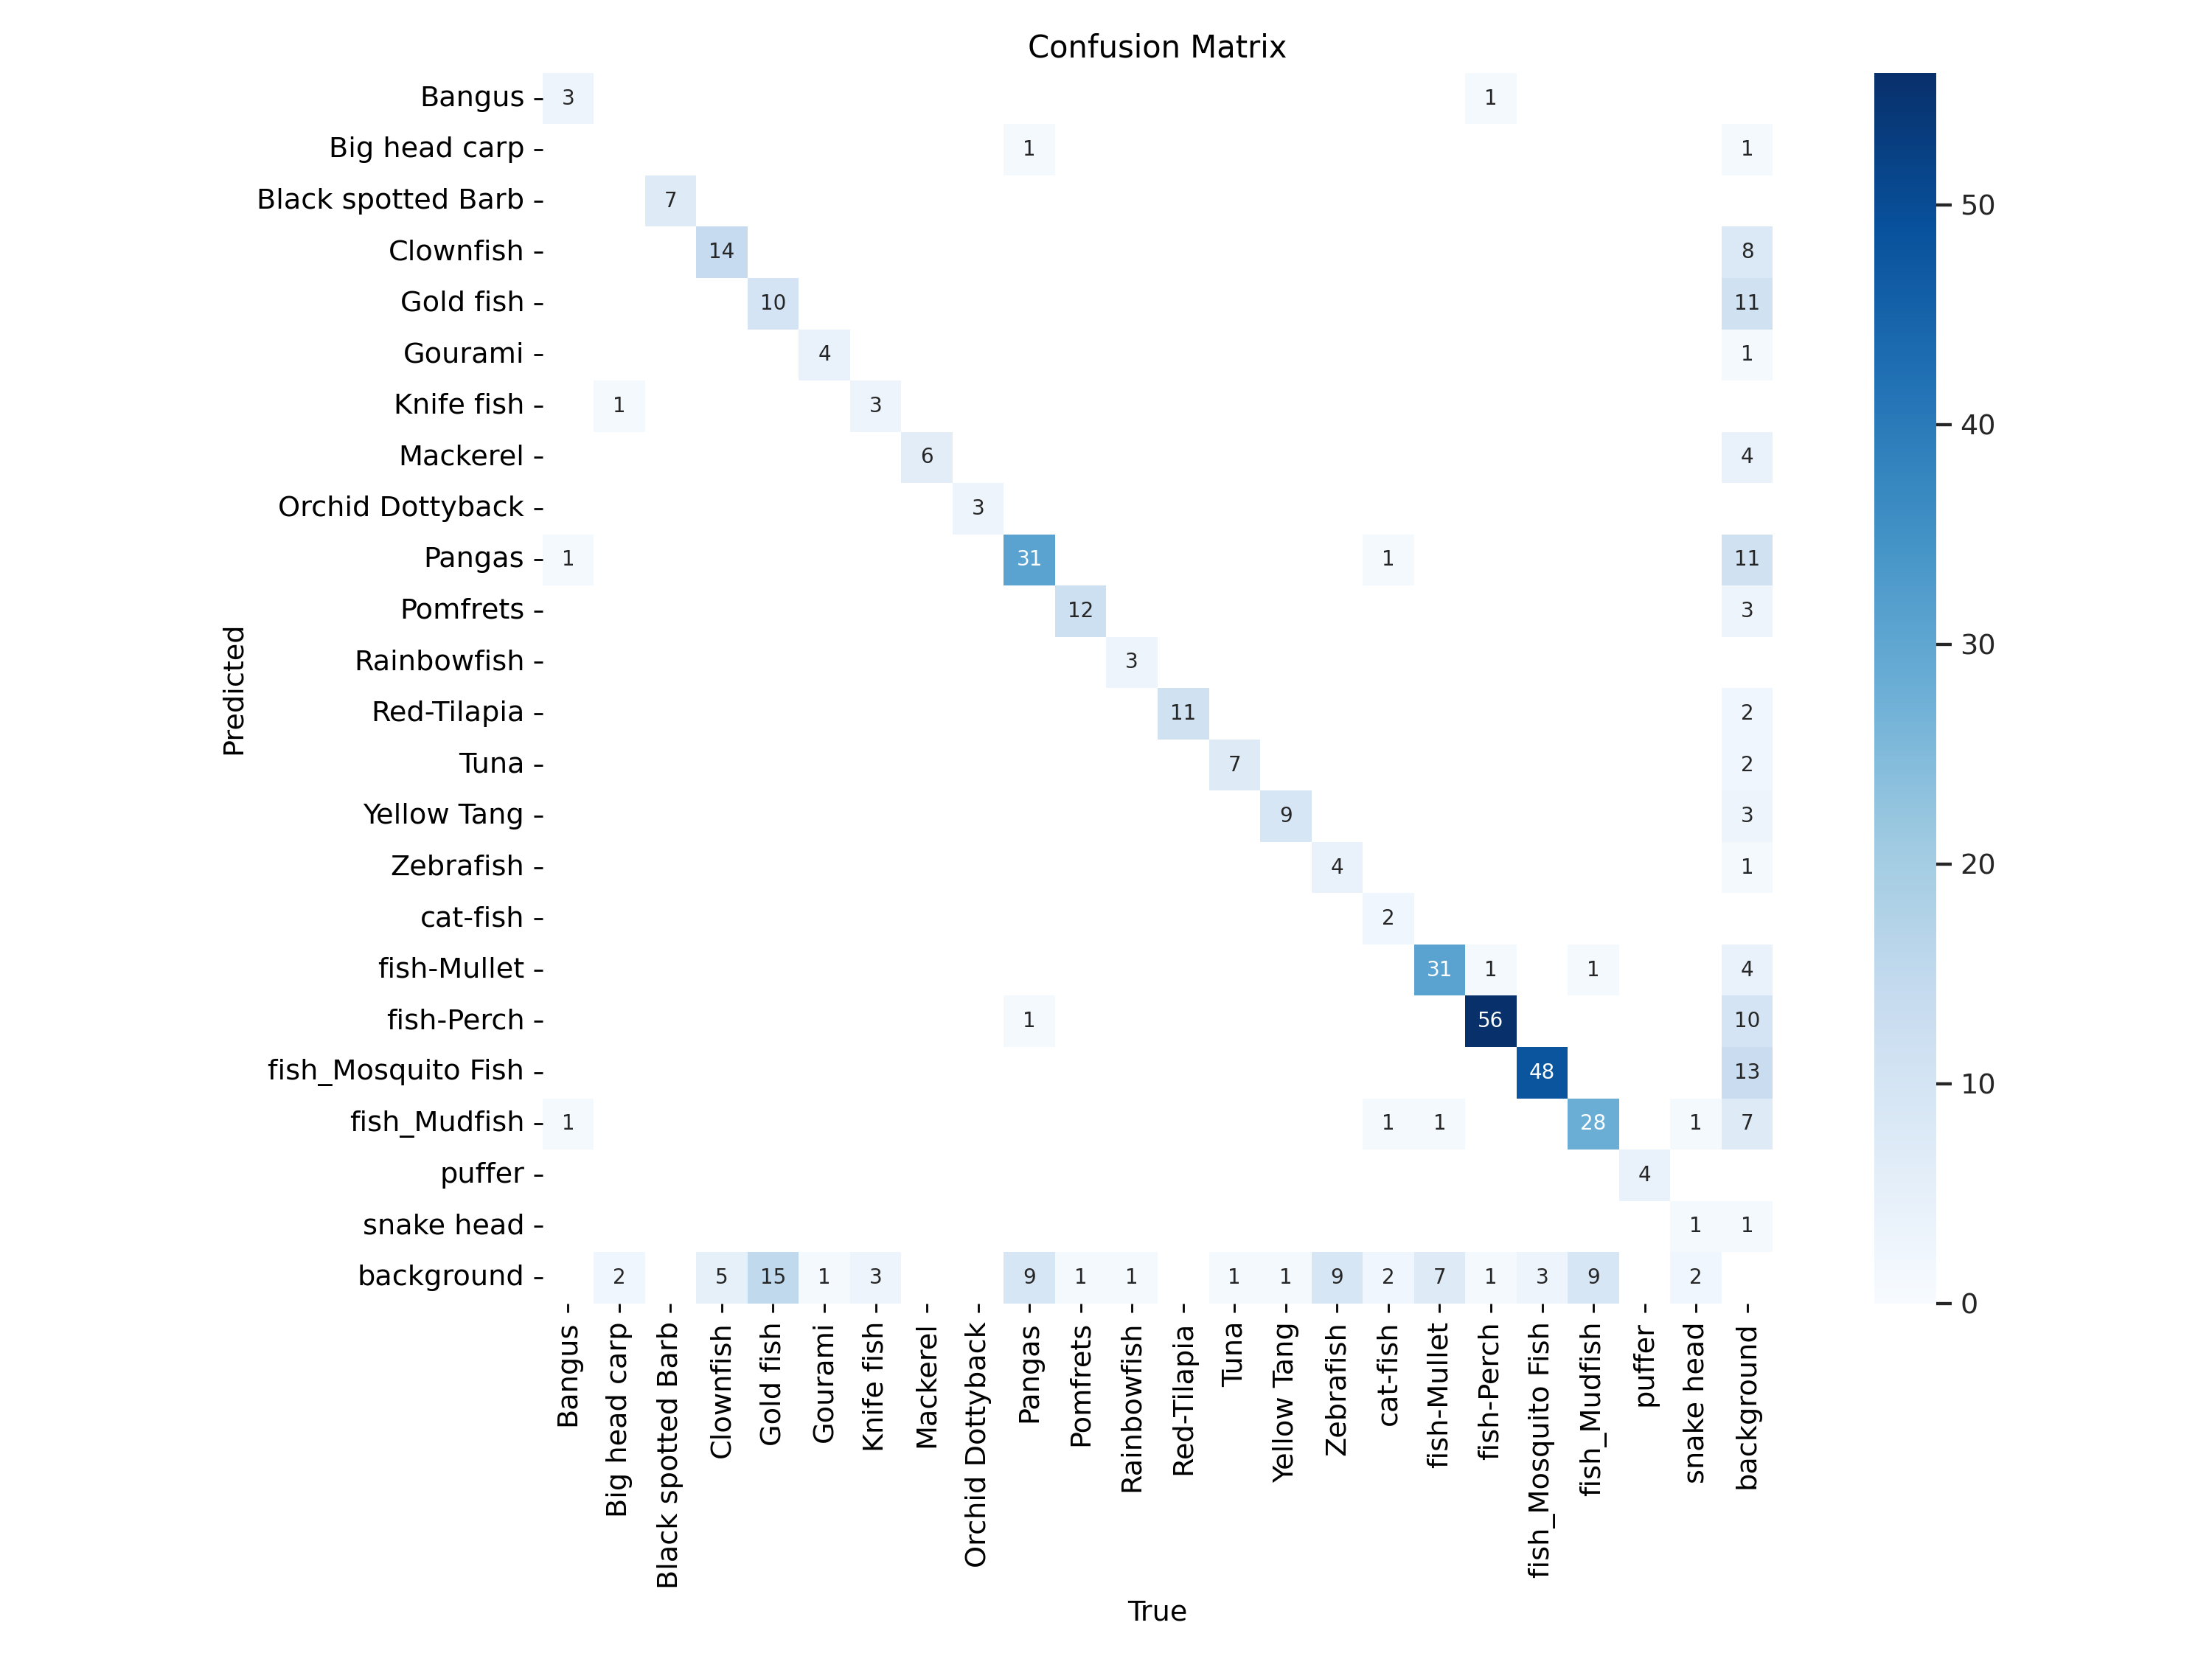

In [4]:
from IPython.display import Image
Image(filename=f'{HOME}/runs-n/detect/train/confusion_matrix.png', width=600)

## test finetuned model with opencv

go to `yolo-working.py`

### export to ONNX

In [8]:
from ultralytics import YOLOv10
model = YOLOv10('runs-n/detect/train/weights/best.pt')
model.export(format="onnx")

Ultralytics YOLOv8.1.34 🚀 Python-3.12.7 torch-2.5.1 CPU (Apple M2 Pro)


/Users/jj/projects/hackathon/reelrecon-ai/.venv/lib/python3.12/site-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(fil

YOLOv10n summary (fused): 285 layers, 2703386 parameters, 0 gradients, 8.3 GFLOPs

PyTorch: starting from 'runs-n/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: export success ✅ 1.8s, saved as 'runs-n/detect/train/weights/best.onnx' (8.9 MB)

Export complete (2.2s)
Results saved to /Users/jj/projects/hackathon/reelrecon-ai/runs-n/detect/train/weights
Predict:         yolo predict task=detect model=runs-n/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs-n/detect/train/weights/best.onnx imgsz=640 data=/content/drive/MyDrive/programming/reelrecon/fish-species-combined/data.yaml  
Visualize:       https://netron.app


'runs-n/detect/train/weights/best.onnx'

### onnxruntime version of exporting to oxxo

In [5]:
from ultralytics import YOLOv10
model = YOLOv10('runs2/detect/train/weights/best.pt')
model.export(format="onnx")

Ultralytics YOLOv8.1.34 🚀 Python-3.12.7 torch-2.5.1 CPU (Apple M2 Pro)
YOLOv10n summary (fused): 285 layers, 2703386 parameters, 0 gradients, 8.3 GFLOPs

PyTorch: starting from 'runs2/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: export success ✅ 0.5s, saved as 'runs2/detect/train/weights/best.onnx' (8.9 MB)

Export complete (1.1s)
Results saved to /Users/jj/projects/hackathon/reelrecon-ai/runs2/detect/train/weights
Predict:         yolo predict task=detect model=runs2/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs2/detect/train/weights/best.onnx imgsz=640 data=/content/drive/MyDrive/programming/reelrecon/fish-species-combined/data.yaml  
Visualize:       https://netron.app


'runs2/detect/train/weights/best.onnx'

In [16]:
!uv run -m scripts.convert --quantize --model_id runs-n/detect/train/weights/best.pt

error: Workspace member `/Users/jj/projects/hackathon/reelrecon-ai/scripts` is missing a `pyproject.toml` (matches: `scripts`)
